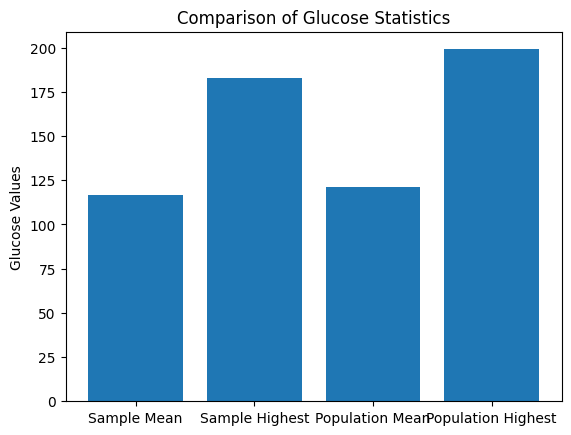

In [1]:
# a)set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
#find the mean Glucose and highest Glucose values of this sample and compare these statistics
#with the population statistics of the same variable. You should use charts for this comparison

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes data
file_path = "c:\\Users\\BHARGAVI\\Downloads\\diabetes.csv"
diabetes_data = pd.read_csv(file_path)

# Set a seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample = diabetes_data.sample(n=25)

# Calculate the mean and highest Glucose values of the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

# Calculate the population mean and highest Glucose values
population_mean_glucose = diabetes_data['Glucose'].mean()
population_highest_glucose = diabetes_data['Glucose'].max()

# Create a bar chart for comparison
labels = ['Sample Mean', 'Sample Highest', 'Population Mean', 'Population Highest']
values = [sample_mean_glucose, sample_highest_glucose, population_mean_glucose, population_highest_glucose]

plt.bar(labels, values)
plt.ylabel('Glucose Values')
plt.title('Comparison of Glucose Statistics')
plt.show()


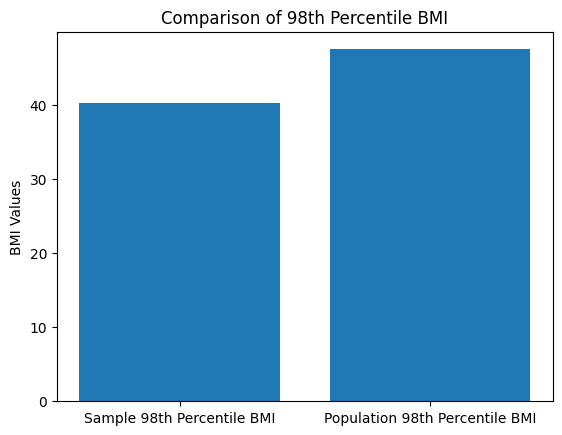

In [2]:
#Find the 98th percentile of BMI of your sample and the population and compare the results
#using charts.

# Calculate the 98th percentile of BMI for the sample and the population
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
population_98th_percentile_bmi = np.percentile(diabetes_data['BMI'], 98)

# Create a bar chart for comparison
labels = ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI']
values = [sample_98th_percentile_bmi, population_98th_percentile_bmi]

plt.bar(labels, values)
plt.ylabel('BMI Values')
plt.title('Comparison of 98th Percentile BMI')
plt.show()

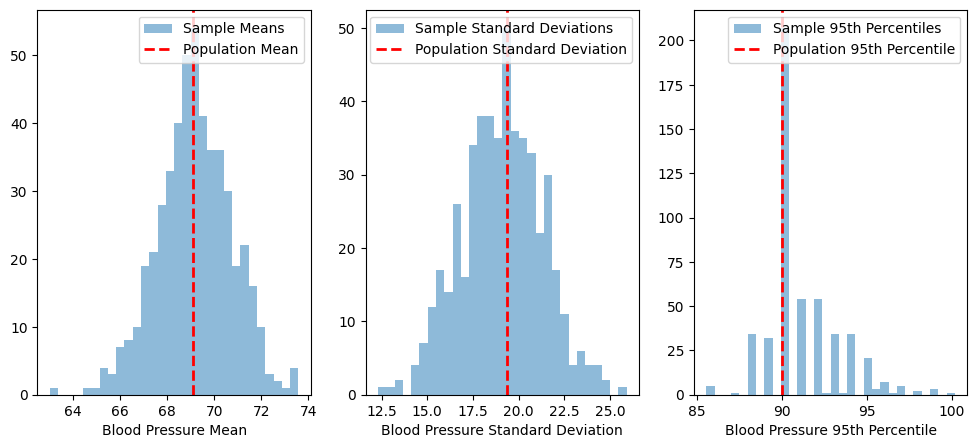

In [3]:
# c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
#population and find the average mean, standard deviation and percentile for BloodPressure and
#compare this with these statistics from the population for the same variable. Again, you should
#create charts for this comparison. Report on your findings.

# Create an empty list to store the sample means, standard deviations, and percentiles
sample_means = []
sample_std_devs = []
sample_percentiles = []

# Create 500 samples of 150 observations each using bootstrap resampling
for _ in range(500):
    sample = diabetes_data['BloodPressure'].sample(n=150, replace=True)
    sample_means.append(sample.mean())
    sample_std_devs.append(sample.std())
    sample_percentiles.append(np.percentile(sample, 95))  # Change the percentile as needed

# Calculate the population mean, standard deviation, and percentile for BloodPressure
population_mean_bp = diabetes_data['BloodPressure'].mean()
population_std_dev_bp = diabetes_data['BloodPressure'].std()
population_percentile_bp = np.percentile(diabetes_data['BloodPressure'], 95)  # Change the percentile as needed

# Create charts for comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.hist(sample_means, bins=30, alpha=0.5, label='Sample Means')
plt.axvline(population_mean_bp, color='r', linestyle='dashed', linewidth=2, label='Population Mean')
plt.xlabel('Blood Pressure Mean')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(sample_std_devs, bins=30, alpha=0.5, label='Sample Standard Deviations')
plt.axvline(population_std_dev_bp, color='r', linestyle='dashed', linewidth=2, label='Population Standard Deviation')
plt.xlabel('Blood Pressure Standard Deviation')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(sample_percentiles, bins=30, alpha=0.5, label='Sample 95th Percentiles')
plt.axvline(population_percentile_bp, color='r', linestyle='dashed', linewidth=2, label='Population 95th Percentile')
plt.xlabel('Blood Pressure 95th Percentile')
plt.legend()

plt.show()